Loading Cleaned Data and Importing:

In [215]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

# Load the Excel file into a DataFrame
data = pd.read_excel("Cleaned_Survey_ICS487_Project.xlsx")

Encoding the target variable(budget rule) and Scaling numerical features

In [216]:
# Encode the target variable
label_encoder = LabelEncoder()
data['budgeting_rule'] = label_encoder.fit_transform(data['budgeting_rule'])

# Scale numerical features for better performance
scaler = StandardScaler()
numerical_columns = ['salary_(sar)', 'monthly_debt_(sar)', 'elementary_expenses_(sar)', 
                     'debt_to_income_ratio', 'savings_ratio', 'number_of_children']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

Model Training:

In [217]:
# Define features (X) and target (y)
X = data.drop(['budgeting_rule'], axis=1)  # Features
y = data['budgeting_rule']  # Target

# Train a Random Forest model using OOB evaluation
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    oob_score=True,
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X, y)

# Get the OOB score
oob_score = rf_model.oob_score_
print(f"OOB Score: {oob_score:.4f}")

# Evaluate the model on training data
y_pred = rf_model.predict(X)

# Accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy on Training Data: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

OOB Score: 0.9144
Accuracy on Training Data: 0.9370

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96       343
           1       0.50      1.00      0.67         6
           2       0.72      1.00      0.83        48

    accuracy                           0.94       397
   macro avg       0.74      0.98      0.82       397
weighted avg       0.96      0.94      0.94       397


Confusion Matrix:
 [[318   6  19]
 [  0   6   0]
 [  0   0  48]]


Feature Importance: Random Forest provides feature importance scores

Feature Importances:
                         Feature  Importance
11                 savings_ratio    0.416607
2      elementary_expenses_(sar)    0.147086
0                   salary_(sar)    0.130739
10          debt_to_income_ratio    0.122781
1             monthly_debt_(sar)    0.078201
4                   state_Single    0.028007
3             number_of_children    0.022540
9              age_group_encoded    0.015817
7      employment_status_Student    0.014656
5                       sex_Male    0.009092
8   employment_status_Unemployed    0.007629
6                   goal_Savings    0.006845


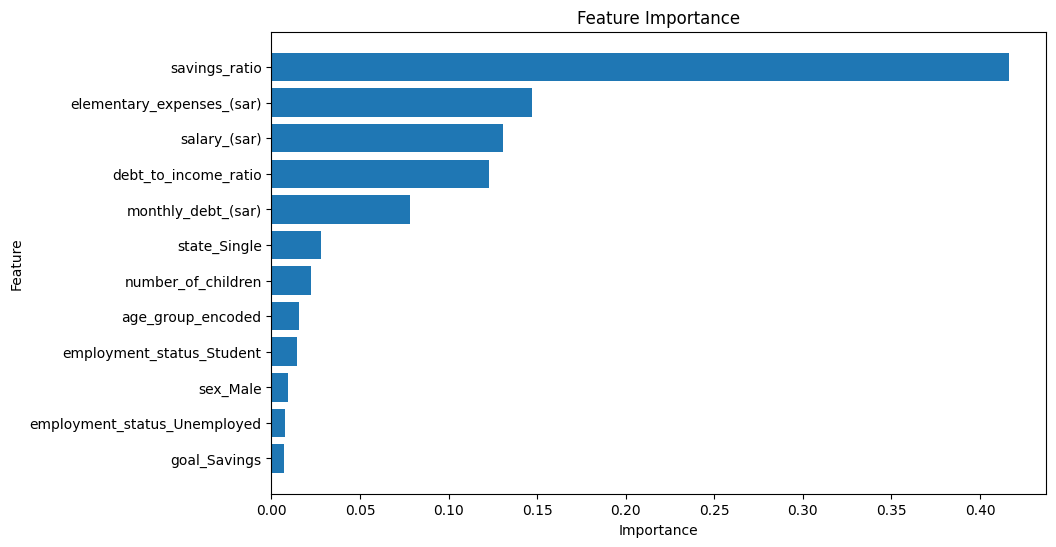

In [218]:
# Feature importance
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

Cross-Validation:

In [219]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X, y, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f}")

Cross-Validation Accuracy: 0.91


Saving the model:

In [220]:
import joblib

# Save the trained random forest model
joblib.dump(rf_model, 'salary_allocation_model.pkl')

['salary_allocation_model.pkl']

In [223]:
data.columns

Index(['salary_(sar)', 'monthly_debt_(sar)', 'elementary_expenses_(sar)',
       'number_of_children', 'budgeting_rule', 'state_Single', 'sex_Male',
       'goal_Savings', 'employment_status_Student',
       'employment_status_Unemployed', 'age_group_encoded',
       'debt_to_income_ratio', 'savings_ratio'],
      dtype='object')

In [225]:
data.head()

,salary_(sar),monthly_debt_(sar),elementary_expenses_(sar),number_of_children,budgeting_rule,state_Single,sex_Male,goal_Savings,employment_status_Student,employment_status_Unemployed,age_group_encoded,debt_to_income_ratio,savings_ratio
0,0.549523,1.770685,-0.304063,1.453786,0,False,False,True,True,False,0,0.796711,-0.675332
1,-0.385242,-0.217432,-1.313237,-0.776757,2,True,False,True,True,False,0,0.117307,-0.931649
2,0.606202,-0.823406,1.984011,1.453786,0,False,False,True,True,False,0,-1.378172,0.147019
3,1.912534,-0.046440,0.640570,2.011422,0,False,False,True,False,False,0,-1.189692,-0.681973
4,-0.539087,-0.638864,-1.465288,-0.776757,0,True,False,False,False,True,1,-0.337380,-1.019793
